# 3. How does the number of people flying between different locations change over time?

In [1]:
# Load the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
!pip install janitor
from functools import reduce

In [2]:
# Set working directory that contains the files
os.chdir("/Users/sugianto/Desktop/dataverse_files")
os.getcwd()

'/Users/sugianto/Desktop/dataverse_files'

In [4]:
# Read data
airports = pd.read_csv("airports.csv")

data1 = pd.read_csv("2000.csv", usecols=["Origin", "Dest", "Year"])
data1 = data1.groupby(["Origin", "Dest"])["Year"].count().reset_index()
data1 = data1.rename(columns={"Year": "y2000"}).sort_values(by="y2000", ascending=False)

# -*- coding: utf-8 -*-
data2 = data2 = pd.read_csv("2001.csv", encoding="iso-8859-1")
data2 = data2.groupby(["Origin", "Dest"])["Year"].count().reset_index()
data2 = data2.rename(columns={"Year": "y2001"}).sort_values(by="y2001", ascending=False)

data3 = pd.read_csv("2002.csv", encoding="iso-8859-1")
data3 = data3.groupby(["Origin", "Dest"])["Year"].count().reset_index()
data3 = data3.rename(columns={"Year": "y2002"}).sort_values(by="y2002", ascending=False)


data4 = pd.read_csv("2003.csv", usecols=["Origin", "Dest", "Year"])
data4 = data4.groupby(["Origin", "Dest"])["Year"].count().reset_index()
data4 = data4.rename(columns={"Year": "y2003"}).sort_values(by="y2003", ascending=False)

data5 = pd.read_csv("2004.csv", usecols=["Origin", "Dest", "Year"])
data5 = data5.groupby(["Origin", "Dest"])["Year"].count().reset_index()
data5 = data5.rename(columns={"Year": "y2004"}).sort_values(by="y2004", ascending=False)

data6 = pd.read_csv("2005.csv", usecols=["Origin", "Dest", "Year"])
data6 = data6.groupby(["Origin", "Dest"])["Year"].count().reset_index()
data6 = data6.rename(columns={"Year": "y2005"}).sort_values(by="y2005", ascending=False)

In [5]:
# Merge all
data_merged = [data1, data2, data3, data4, data5, data6]
data_locs = reduce(lambda left, right: pd.merge(left, right, on=["Origin", "Dest"], how="outer"), data_merged)
data_locs.head()

,Origin,Dest,y2000,y2001,y2002,y2003,y2004,y2005
0,LAX,LAS,17745.0,16165.0,12733.0,11262.0,12494.0,12536.0
1,PHX,LAX,17041.0,14515.0,11066.0,10498.0,10422.0,10819.0
2,LAS,LAX,16899.0,15788.0,12526.0,11177.0,12487.0,12519.0
3,LAX,PHX,16652.0,14149.0,11027.0,10518.0,10469.0,10820.0
4,LAX,SFO,16021.0,13244.0,9832.0,8487.0,9049.0,8427.0


In [6]:
# Clean the new data and replace nan with 0 or no flights
data_locs = data_locs.fillna(0)
data_locs["Total"] = data_locs.iloc[:, 2:].sum(axis=1) # Create new Total column
data_locs = data_locs.sort_values("Total", ascending=False) # Arrange
data_locs = data_locs.head(20)

In [8]:
# add locations together:
connection_1 = data_locs.iloc[0,2:8] + data_locs.iloc[1,2:8]
connection_1["connection"] = "LAX&LAS"
connection_1 = connection_1.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_2 = data_locs.iloc[2,2:8] + data_locs.iloc[3,2:8]
connection_2["connection"] = "PHX&LAX"
connection_2 = connection_2.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_3 = data_locs.iloc[4,2:8] + data_locs.iloc[5,2:8]
connection_3["connection"] = "MSP&ORD"
connection_3 = connection_3.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_4  = data_locs.iloc[6,2:8] + data_locs.iloc[7,2:8]
connection_4["connection"] = "BOS&LGA"
connection_4 = connection_4.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_5 = data_locs.iloc[8,2:8] + data_locs.iloc[9,2:8]
connection_5["connection"] = "SAN&LAX"
connection_5 = connection_5.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_6 = data_locs.iloc[10,2:8] + data_locs.iloc[11,2:8]
connection_6["connection"] = "LAS&PHX"
connection_6 = connection_6.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_7 = data_locs.iloc[12,2:8] + data_locs.iloc[13,2:8]
connection_7["connection"] = "DCA&LGA"
connection_7 = connection_7.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_8 = data_locs.iloc[14,2:8] + data_locs.iloc[15,2:8]
connection_8["connection"] = "LGA&ORD"
connection_8 = connection_8.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_9 = data_locs.iloc[16,2:8] + data_locs.iloc[17,2:8]
connection_9["connection"] = "SFO&LAX"
connection_9 = connection_9.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

connection_10 = data_locs.iloc[18,2:8] + data_locs.iloc[19,2:8]
connection_10["connection"] = "HOU&DAL"
connection_10 = connection_10.reindex(["connection"] + data_locs.columns[:-1].tolist(), axis=1)

In [9]:
#create total column
data_locs['Total'] = data_locs.sum(axis=1)
data_locs=data_locs.sort_values(by=['Total'], ascending=False).reset_index(drop=False)
data_locs

/var/folders/vl/v7290b8s297_hp6k0mts1x640000gn/T/ipykernel_929/2218686293.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_locs['Total'] = data_locs.sum(axis=1)


,index,Origin,Dest,y2000,y2001,y2002,y2003,y2004,y2005,Total
0,0,LAX,LAS,17745.0,16165.0,12733.0,11262.0,12494.0,12536.0,165870.0
1,2,LAS,LAX,16899.0,15788.0,12526.0,11177.0,12487.0,12519.0,162792.0
2,1,PHX,LAX,17041.0,14515.0,11066.0,10498.0,10422.0,10819.0,148722.0
3,3,LAX,PHX,16652.0,14149.0,11027.0,10518.0,10469.0,10820.0,147270.0
4,8,MSP,ORD,12979.0,12419.0,12007.0,12377.0,11729.0,9781.0,142584.0
5,7,ORD,MSP,12993.0,12361.0,11907.0,12254.0,11942.0,9760.0,142434.0
6,39,BOS,LGA,8647.0,11087.0,11539.0,12662.0,13456.0,13186.0,141154.0
7,38,LGA,BOS,8652.0,11085.0,11537.0,12568.0,13079.0,13161.0,140164.0
8,697,SAN,LAX,2573.0,12820.0,8961.0,15475.0,14525.0,15237.0,139182.0
9,696,LAX,SAN,2575.0,12806.0,8956.0,15462.0,14511.0,15223.0,139066.0


In [10]:
data2 = [connection_1, connection_2, connection_3, connection_4, connection_5, connection_6, connection_7, connection_8, connection_9,connection_10] #select frames
data_locs2 = pd.concat(data2, sort=False) #merge 
data_locs2 = data_locs.sort_values(by="Total", ascending=False) #arrange
data_locs2 #explore

,index,Origin,Dest,y2000,y2001,y2002,y2003,y2004,y2005,Total
0,0,LAX,LAS,17745.0,16165.0,12733.0,11262.0,12494.0,12536.0,165870.0
1,2,LAS,LAX,16899.0,15788.0,12526.0,11177.0,12487.0,12519.0,162792.0
2,1,PHX,LAX,17041.0,14515.0,11066.0,10498.0,10422.0,10819.0,148722.0
3,3,LAX,PHX,16652.0,14149.0,11027.0,10518.0,10469.0,10820.0,147270.0
4,8,MSP,ORD,12979.0,12419.0,12007.0,12377.0,11729.0,9781.0,142584.0
5,7,ORD,MSP,12993.0,12361.0,11907.0,12254.0,11942.0,9760.0,142434.0
6,39,BOS,LGA,8647.0,11087.0,11539.0,12662.0,13456.0,13186.0,141154.0
7,38,LGA,BOS,8652.0,11085.0,11537.0,12568.0,13079.0,13161.0,140164.0
8,697,SAN,LAX,2573.0,12820.0,8961.0,15475.0,14525.0,15237.0,139182.0
9,696,LAX,SAN,2575.0,12806.0,8956.0,15462.0,14511.0,15223.0,139066.0


In [11]:
# add total by year row
data_locs3 = data_locs2.append(data_locs2.sum(numeric_only=True).rename('Total')).reset_index(drop=True)

# Count connections
cons = (data_locs.groupby(['Origin', 'Dest', 'Total'])
                             .agg(n=('Total', 'sum'))
                             .reset_index()
                             .sort_values('Total', ascending=False)
                )
cons['rank'] = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10]


/var/folders/vl/v7290b8s297_hp6k0mts1x640000gn/T/ipykernel_929/3630186975.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_locs3 = data_locs2.append(data_locs2.sum(numeric_only=True).rename('Total')).reset_index(drop=True)


In [12]:
# 2nd df with lat and long data from airports ds for line between airports
cons2 = pd.merge(cons, airports, left_on='Origin', right_on='iata') \
                    .loc[:, ['Origin', 'Dest', 'n', 'lat', 'long']] \
                    .rename(columns={'lat': 'Origin_Lat', 'long': 'Origin_Long'}) \
                .merge(airports, left_on='Dest', right_on='iata') \
                    .loc[:, ['Origin', 'Dest', 'n', 'Origin_Lat', 'Origin_Long', 'lat', 'long']] \
                    .rename(columns={'lat': 'Dest_Lat', 'long': 'Dest_Long'})



In [13]:
# 3nd df for the labels of airports
# 3nd df for the labels of airports
cons3_1 = cons.groupby('Origin', as_index=False)['n'].sum().sort_values('n', ascending=False)
cons3_1 = cons3_1[['Origin', 'n']]

# Join
cons3 = pd.merge(cons3_1, airports, left_on='Origin', right_on='iata') \
                     .loc[:, ['Origin', 'lat', 'long']] \
                     .rename(columns={'lat': 'Origin_Lat', 'long': 'Origin_Long'})
print(cons3.columns)

Index(['Origin', 'Origin_Lat', 'Origin_Long'], dtype='object')


In [14]:
from calendar import month_abbr

# data prep
plot_data_locs2 = data_locs2.iloc[:, 0:7] # plot 1 data
plot_data_locs2 = data_locs2.iloc[:, [0, 2, 3, 4, 7]] # plot 2 data
plot3_data_locs2 = data_locs3.iloc[:, 0:7]

#Plot exploration in year 2000
data1_2 = pd.read_csv("2000.csv")[["Origin", "Dest", "Month"]] \
            .groupby("Month") \
            .size() \
            .reset_index(name="y2000")
data1_2["Month_name"] = data1_2["Month"].apply(lambda x: month_abbr[x])




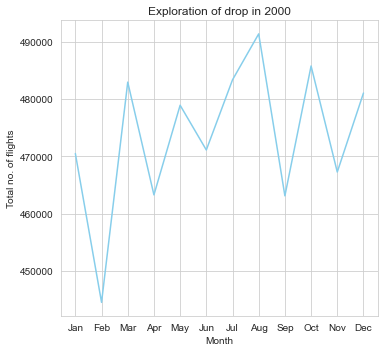

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))



# Plot 2
plt.subplot(1, 2, 2)
sns.lineplot(data=data1_2, x="Month_name", y="y2000", color="skyblue")
plt.title("Exploration of drop in 2000")
plt.xlabel("Month")
plt.ylabel("Total no. of flights")

plt.tight_layout()
plt.show()

